# マグノン

（初版：2020年3月、更新：2023年2月21日）    

スピン波は強磁性体などの秩序状態にあるスピン系において発生する。
スピン波を量子化したものがマグノンである。

## スピン波の分散関係

一次元ハイゼンベルグモデルから、以下のようなスピン波の分散関係が求められる。

### 　$\displaystyle{\omega = \frac{4JS}{\hbar}[1-\cos (qa)]}$  

ここで、  
$S$ : スピン、$J$ : 交換積分、$a$ : 格子定数、$q$ : 波数、$\omega$ : 角周波数  
である。

これをJuliaでかいてみる。  

gifにした時に、角周波数 $\omega$ [rad/s] より周波数 $f$ [Hz] の方が分かりやすいので、$\omega \to f$ に変える。  
また、波数も $\displaystyle{q \to q\frac{2\pi}{a}}$ に変える。  
周波数の最大値を 1 Hz になるように設定すると分散関係は
### 　$\displaystyle{f = \frac{1}{2}\left[ 1-\cos \left( 2\pi q \right) \right]}$  
となる。これをプロットすると以下のようになる。

In [1]:
using Plots
using Plots.PlotMeasures
using LaTeXStrings

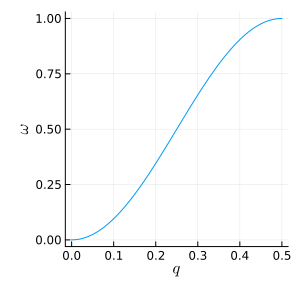

In [2]:
qvec = collect(0:0.01:0.5) # qのArray
wvec = @. 0.5*(1-cos(2π*qvec)) # ωのArray
plot(qvec, wvec, legend=false, xlabel=L"q", ylabel=L"ω", size=(300,300))

## スピン波のアニメーション  

波数を決めて、そのときのスピン波の様子のgif動画を作る。  
動画作成には下記URLを参考にした。  
[Qiita: JuliaでグラフのGIFアニメを作ってみた](https://qiita.com/MTNakata/items/0418ae3493a26ac44603)  

教科書などでは円錐状の回転運動としてスピン波の様子が描かれているが、簡単に描くため、2Dで左右に首を振るような形にした（真横から見ているイメージ）。  

これらを踏まえて作成したgif動画は以下になる。

In [3]:
function main1(a, qval, num)
    
    fval  = 0.5*(1-cos(2π*qval)) # Hzだとωよりfが良いので変えとく。
    xvec1 = a.*collect(0:1:num);
    xvec2 = a.*collect(0:0.1:num);
    yvec1  = zeros(length(xvec1)) .+ 1.0;
    arrowyvec1 = ones(length(xvec1));

    flamenum  = Int64(round(10/fval))
    println("T = ", round(100/fval)/100, " sec, f = ", round(fval*100)/100, " Hz, flame_num = ", flamenum)
    anim = Animation()
    
    for t = range(0, 1/fval*((flamenum-1)/flamenum), length = flamenum)
        φvec1 = @. a*0.5*sin(xvec1*(qval*2π/a) + 2π*fval*t)
        φvec2 = @. 0.5*sin(xvec2*(qval*2π/a) + 2π*fval*t)
        plt = scatter(xvec1, yvec1, legend=false, ylims=[-0.5,2.5], xlims=[xvec1[begin], xvec1[end]], size=(800,200))
        plt = quiver!(xvec1, yvec1, quiver = (φvec1, arrowyvec1))
        plt = plot!(xvec2, φvec2)
        frame(anim, plt)
    end

    return gif(anim, "magnon.gif", fps = 10)
end

main1 (generic function with 1 method)

T = 1.0 sec, f = 1.0 Hz, flame_num = 10


Plots.AnimatedGif("D:\\Dropbox\\Python_Julia\\Julia\\教育用\\magnon.gif")
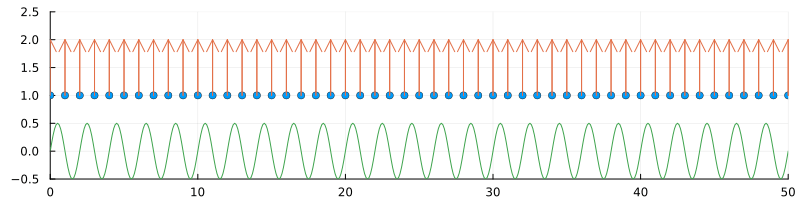

In [4]:
a = 1; # 格子定数。何でも良い。
num = 50; # 表示するスピンの数
qval = 1/2; # 波数

main1(a, qval, num)

T = 1.11 sec, f = 0.9 Hz, flame_num = 11


Plots.AnimatedGif("D:\\Dropbox\\Python_Julia\\Julia\\教育用\\magnon.gif")
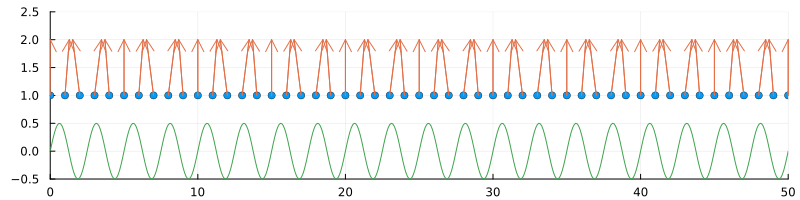

In [5]:
a = 1;
num = 50;
qval = 2/5;

main1(a, qval, num)

T = 1.53 sec, f = 0.65 Hz, flame_num = 15


Plots.AnimatedGif("D:\\Dropbox\\Python_Julia\\Julia\\教育用\\magnon.gif")
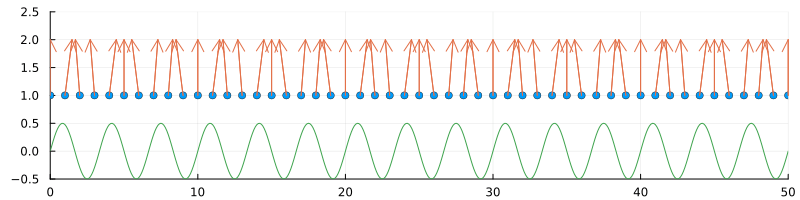

In [6]:
a = 1;
num = 50;
qval = 3/10

main1(a, qval, num)

T = 2.89 sec, f = 0.35 Hz, flame_num = 29


Plots.AnimatedGif("D:\\Dropbox\\Python_Julia\\Julia\\教育用\\magnon.gif")
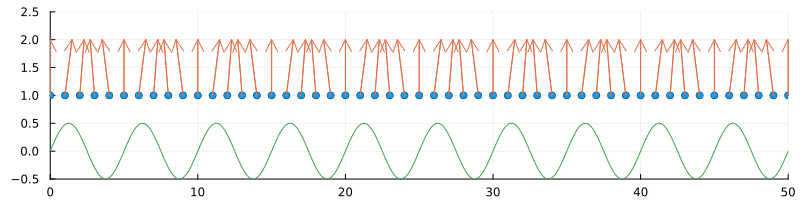

In [7]:
a = 1;
num = 50;
qval = 1/5

main1(a, qval, num)

T = 10.47 sec, f = 0.1 Hz, flame_num = 105


Plots.AnimatedGif("D:\\Dropbox\\Python_Julia\\Julia\\教育用\\magnon.gif")
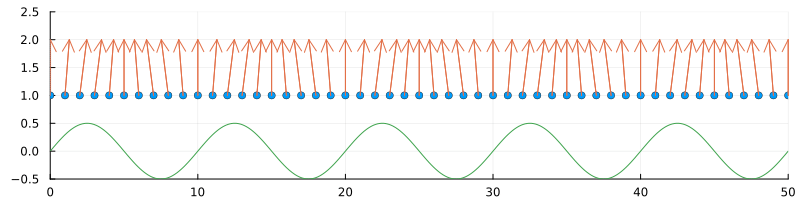

In [8]:
a = 1;
num = 50;
qval = 1/10

main1(a, qval, num)